In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.tail()

,Price,Open,High,Low
Date,,,,
2020-05-29,78.29,78.21,78.41,77.75
2020-06-01,79.27,78.21,79.36,78.04
2020-06-02,80.40,79.26,80.56,79.15
2020-06-03,80.70,80.40,80.82,79.96
2020-06-04,80.71,80.80,80.89,80.51


# Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

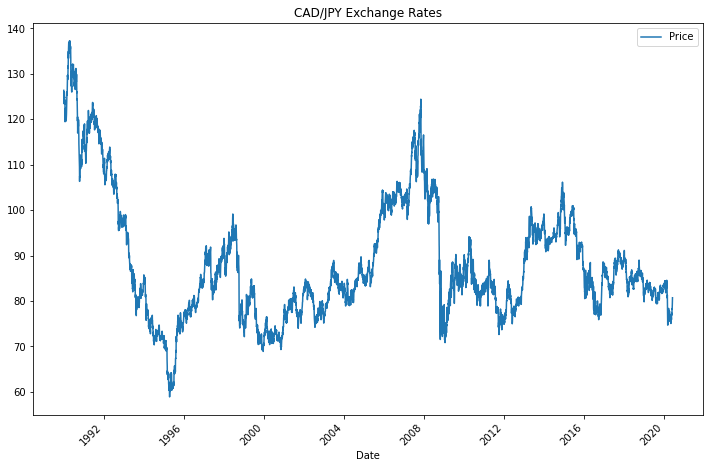

In [4]:
# Plot just the "Price" column from the dataframe:
# YOUR CODE HERE!
plt.figure(figsize=(12,8))
fig = cad_jpy_df["Price"].plot(title = "CAD/JPY Exchange Rates", legend = "Price", rot = 45)

In [5]:
# Calculate data to have a visual exploration of CAD/JPY
fx_min = cad_jpy_df.Price.min()
print(f"The minimum price of cad/jpy is  {fx_min}")
fx_max = cad_jpy_df.Price. max()
print(f"The maximum price of cad/jpy is  {fx_max}")
ma_200 = cad_jpy_df.Price.rolling(window = 200).mean()
ma_50 = cad_jpy_df.Price.rolling(window = 50).mean()


The minimum price of cad/jpy is  58.88
The maximum price of cad/jpy is  137.28


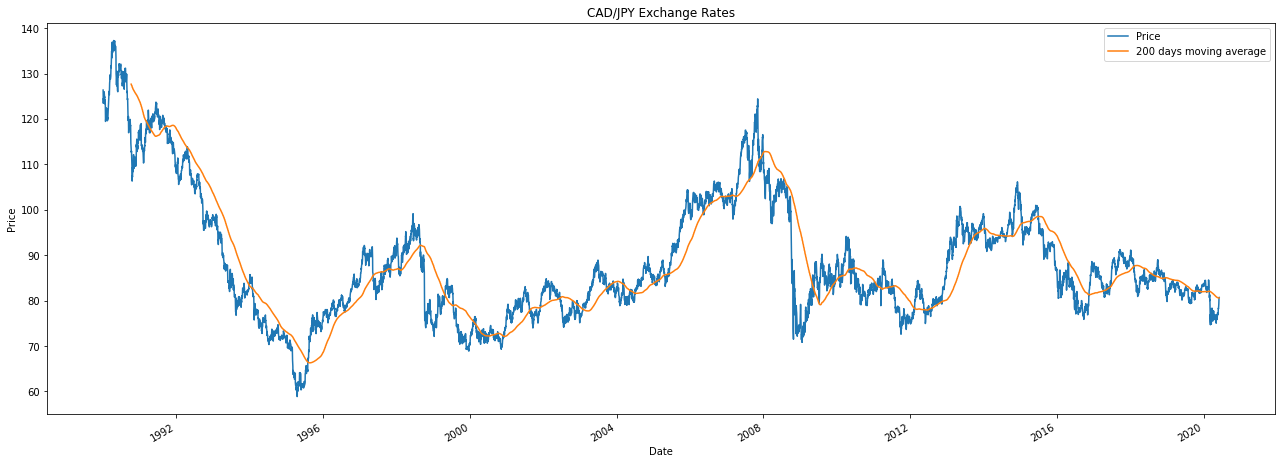

In [28]:
# Plot data to check the pattern of CAD/JPY
plt.figure(figsize=(22,8))
figure = cad_jpy_df.Price.plot(title = "CAD/JPY Exchange Rates", label = "Price", rot = 45)
figure = ma_200.plot(label = "200 days moving average")
plt.ylabel("Price")
plt.legend()
# plt.savefig("trend.png")

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** *Over 20 years, it is clearly that CAD is weakened over JPY since its peak of 137.28. Looking back 10 years, CAD/JPY is trading in a range between 70 and 100. However in short-term, since begining 2020 CAD is trading under 200 days of moving average showing a negative momentum. However, looking at the chart, in short term the price is hard to break the all-time low.


---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [7]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
# YOUR CODE HERE!
ts_noise, ts_trend = sm.tsa.filters.hpfilter(cad_jpy_df.Price)

In [8]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!
df = cad_jpy_df[["Price"]]
df["trend"] = ts_trend
df["noise"] = ts_noise
df

,Price,trend,noise
Date,,,
1990-01-02,126.37,125.850905,0.519095
1990-01-03,125.30,125.679684,-0.379684
1990-01-04,123.46,125.508788,-2.048788
1990-01-05,124.54,125.338304,-0.798304
1990-01-08,124.27,125.167037,-0.897037
...,...,...,...
2020-05-29,78.29,78.793961,-0.503961
2020-06-01,79.27,79.051061,0.218939
2020-06-02,80.40,79.311883,1.088117


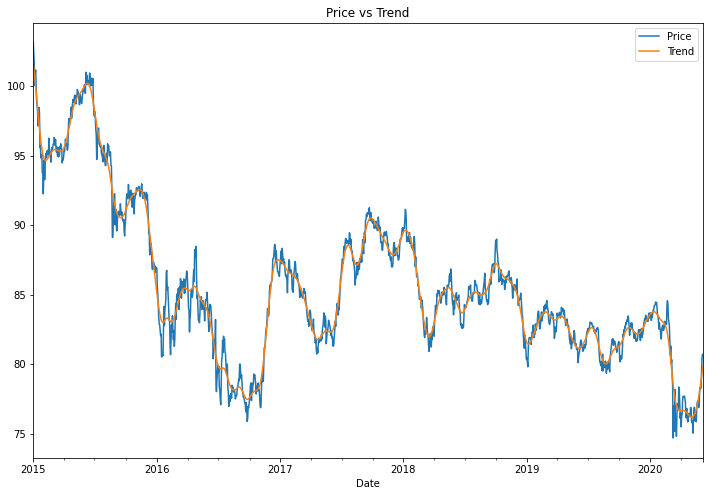

In [27]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
plt.figure(figsize=(12,8))
fig = df.Price.loc["2015":].plot(title = "Price vs Trend", label = "Price")
fig = df.trend.loc["2015":].plot(label = "Trend")
plt.legend()
# plt.savefig("price_vs_trend.png")

**Question:** Do you see any patterns, long-term and/or short?

**Answer:** In short term, the trend show CAD/JPY recovers from its trough since 2015.

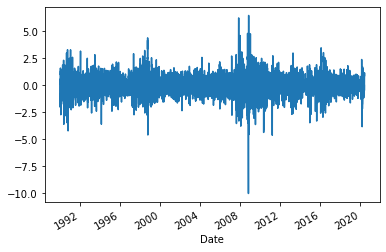

In [29]:
# Plot the Settle Noise
# YOUR CODE HERE!
df.noise.plot()
# plt.savefig("noise.png")

---

# Forecasting Returns using an ARMA Model

Using exchange rate *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [11]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns

,Price
Date,
1990-01-03,-0.846720
1990-01-04,-1.468476
1990-01-05,0.874777
1990-01-08,-0.216798
1990-01-09,0.667901
...,...
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508


In [12]:
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!
model = ARMA(returns.values, order = (2,1))

# Fit the model and assign it to a variable called results
# YOUR CODE HERE!
results1 = model.fit()

In [13]:
# Output model summary results:
# YOUR CODE HERE!
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Wed, 26 Jan 2022   AIC                          19513.955
Time:                        20:18:15   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.y       -0.8547      0.164     -5.200      0.000      -1.177      -0.533
ar.L2.y       -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.y        0.8246      0.164      5.031      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1699           +0.0000j           42.1699            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

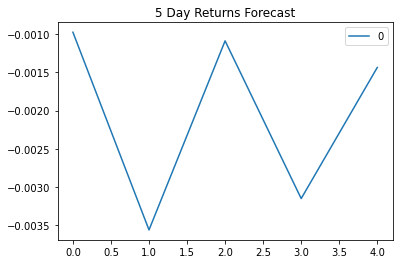

In [30]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!
pd.DataFrame(results1.forecast(steps=5)[0]).plot(title="5 Day Returns Forecast")
# plt.savefig("ARMA.png")

**Question:** Based on the p-value, is the model a good fit?

**Answer:** p_value of Lag 2 = 0.14 which is higher than 0.05 -> the model is not a good fit at all.

---

# Forecasting the Exchange Rate Price using an ARIMA Model

 1. Using the *raw* CAD/JPY exchange rate price, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [15]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
model = ARIMA(cad_jpy_df["Price"], order= (5,1,1))

# Fit the model
# YOUR CODE HERE!
results2 = model.fit()

C:\Users\HOANG\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HOANG\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [16]:
# Output model summary results:
# YOUR CODE HERE!
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.622
Method:                       css-mle   S.D. of innovations              0.729
Date:                Wed, 26 Jan 2022   AIC                          17507.244
Time:                        20:18:18   BIC                          17563.070
Sample:                             1   HQIC                         17526.361
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.008     -0.743      0.458      -0.021       0.009
ar.L1.D.Price     0.4287      0.246      1.740      0.082      -0.054       0.912
ar.L2.D.Price     0.0177      0.014      1.264      0.206      -0.010       0.045
ar.L3.D.Price    -0.0118      0.012     -0.959      0.337      -0.036       0.012
ar.L4.D.Price     0.0110      0.012      0.879      0.379      -0.013       0.035
ar.L5.D.Price    -0.0191      0.011     -1.702      0.089      -0.041       0.003
ma.L1.D.Price    -0.4568      0.246     -1.855      0.064      -0.939       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7660           -0.7702j            1.9266           -0.0655
AR.2            1.7660           +0.7702j            1.9266            0.0655
AR.3           -2.3649           -0.0000j            2.3649           -0.5000
AR.4           -0.2974           -2.4212j            2.4394           -0.2695
AR.5           -0.2974           +2.4212j            2.4394            0.2695
MA.1            2.1893           +0.0000j            2.1893            0.0000
-----------------------------------------------------------------------------
"""

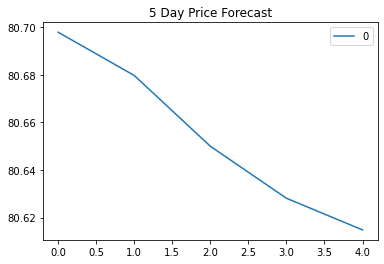

In [31]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
pd.DataFrame(results2.forecast(steps=5)[0]).plot(title="5 Day Price Forecast")
#plt.savefig("ARIMA.png")

**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** According to ARIMA model, the CAD/JPY decreases meaning that CAD continues to decrease and Japanese Yen is appreciated.

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using exchange rate *Returns*, estimate a GARCH model. **Hint:** You can reuse the `returns` variable from the ARMA model section.

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [18]:
from arch import arch_model

In [19]:
# Estimate a GARCH model:
# YOUR CODE HERE!
model = arch_model(returns, mean = "Zero", vol = "GARCH", p =2, q = 1)
# Fit the model
# YOUR CODE HERE!
results3 = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46422.98949050592
Iteration:      2,   Func. Count:     16,   Neg. LLF: 750294344.734088
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8928.83294284218
Iteration:      4,   Func. Count:     27,   Neg. LLF: 11771.414799645492
Iteration:      5,   Func. Count:     33,   Neg. LLF: 10427.086357403761
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8916.32245070437
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8911.11097338583
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8911.027201221863
Iteration:      9,   Func. Count:     57,   Neg. LLF: 8911.021988931901
Iteration:     10,   Func. Count:     62,   Neg. LLF: 8911.021072040523
Iteration:     11,   Func. Count:     67,   Neg. LLF: 8911.020826867456
Iteration:     12,   Func. Count:     72,   Neg. LLF: 4373718970.58663
Iteration:     13,   Func. Count:     83,   Neg. LLF: 1074894365.3143122
Optimization terminated successfully    (Exit mode 0)
            

In [20]:
# Summarize the model results
# YOUR CODE HERE!
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Wed, Jan 26 2022   Df Residuals:                     7928
Time:                        20:18:20   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0739e-03  2.545e-03      3.566  3.629e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.681e-04  [2.647e-02,9.841e-02]
alpha[2]   2.1079e-07  2.010e-02  1.049e-05      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.201      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [21]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [22]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
forecasts = results3.forecast(start= last_day, horizon= forecast_horizon)
forecasts

In [23]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.565979,12.573666,12.581247,12.588724,12.596097


In [24]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.565979
h.2,12.573666
h.3,12.581247
h.4,12.588724
h.5,12.596097


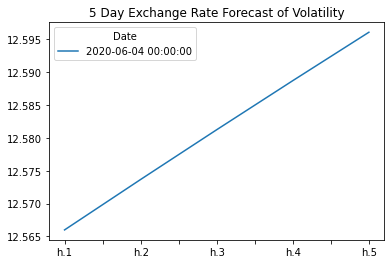

In [32]:
# Plot the final forecast
# YOUR CODE HERE!
final.plot(title="5 Day Exchange Rate Forecast of Volatility")
#plt.savefig("GARCH.png")

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:** Volatility will increase in next 5 days. For companies dealing with a lot of fx transactions, they may think of hedging the risk. For hedge fund, it's time for arbitrage.

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

* Not yet enough information for me to buy yen now. ARMA and ARIMA both are not qualified to pass 95% confidence interval. While GARCH shows the increase of volatility but up or down side I am not sure yet.

2. Is the risk of the yen expected to increase or decrease?
* According to GARCH model, the risk is expected to increase

3. Based on the model evaluation, would you feel confident in using these models for trading?
* I do not depend solely on these models. For ARMA and ARIMA with 95% confidence interval, high p-value makes model insignificant. GARCH seems to be better among all, but its BIC and AIC are both higher than ARIMA. 

* After all, when thinking about using the models for trading, I surely need more information and more time to validate and test the model to decide whether or not to use it.